In [284]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import numpy as np



In [285]:
tsla = pdr.DataReader('tsla', data_source='yahoo', start='2018-1-1') 
tsla.reset_index(inplace=True)
tsla.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
329,2019-04-25,259.000000,246.070007,255.000000,247.630005,21849400,247.630005
330,2019-04-26,246.679993,231.130005,246.500000,235.139999,22360700,235.139999
331,2019-04-29,243.979996,232.169998,235.860001,241.470001,16714500,241.470001
332,2019-04-30,244.210007,237.000000,242.059998,238.690002,9464600,238.690002
333,2019-05-01,240.000000,231.500000,238.850006,234.009995,10693600,234.009995


In [287]:
def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

    
date_conv = np.vectorize(dt.datetime.fromtimestamp)    

In [288]:
date = tsla.loc[:, 'Date'].values
date = date2num(date)
openp = tsla.loc[:, 'Open'].values
highp = tsla.loc[:, 'High'].values
lowp = tsla.loc[:, 'Low'].values
closep = tsla.loc[:,'Close'].values
volume = tsla.loc[:, 'Volume'].values

x = 0
y = len(date)
new_list = []
while x<y:
    append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
    new_list.append(append_line)
    x += 1

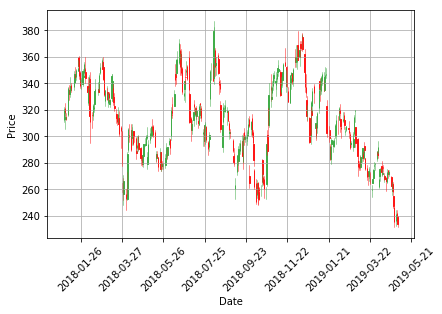

In [293]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
plt.ylabel('Price')
plt.xlabel('Date')


candlestick_ohlc(ax1, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
ax1.grid(True) #, color = 'm', linestyle='-',linewidth=0.3)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

plt.subplots_adjust(left=0.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
plt.show()